<h1 style="font-size:3rem;color:orange;">Bremsstrahlung non relativistic cross-section</h1>

$\mathbf{LOG BOOK:}$

[x] Understanding r_max role

[x] Recovering r_max plot

    - [x] solving the problem with copper density
    
    - [x] fixing Debye screening lenght
    
[ ] Plotting non relativistic bremsstrahlung cross section 

    - [ ] fixing Elwert factor divergence for x approaching 1
          (check validity of the hypothesis)
          
    - [ ] Recover the correct behaviour of sigma without Elwert

---- Experiment with git hub ----

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from numba import njit
#import panda as pd

#Constants
e_0 = 8.854*10**(-12) # F/m
hbar = 1.054*10**(-34) # J*s
m = 9.109*10**(-31) # kg ; 'm' it's electorn mass (untill further masses appear)
e = 1.602*10**(-19) # C
k_b = 1.380*10**(-23) # J/K
c = 2.997*10**(8) #m/s
r_e = (e**2)/(4*np.pi*e_0*m*c**2) #m
alpha_f = (e**2)/(4*np.pi*e_0*hbar*c)
n_Cu = 8.5*10**28 #m^(-3)
Z = 29 #Copper

# Thomas Fermi Potential

An example of a model of Coulomb interaction accounting for the shielding of bound electrons is a Yukawa potential with Thomas-Fermi length ($ L_{TF}$) as screening length.

$$ V_{TF}(r) = \frac{Ze}{4 \pi \epsilon_{0}} exp(-r/L_{FT})$$

$$ L_{TF} = 4 \pi \epsilon_{0} \frac{\hbar^2}{m e^{2}}Z^{-1/3}$$

In [4]:
#Thomas Fermi screening length in Copper
def TF_length(Z):
    L_TF = 4*np.pi*e_0*((hbar**2)/(m*e**2))*(Z**(-1/3))
    return L_TF

print(TF_length(Z))

1.7209524802394428e-11


# Debye Potential

A way to take into count the screening of free electrons and plasma ions is give by the following Yukawa potential with Debuy length ($L_{D}$) as screening length.

$$ V_{D}(r) = \frac{Ze}{4 \pi \epsilon_{0}} exp(-r/L_{D})$$

$$ L_{D} = \sqrt{\frac{\epsilon_{0}k_{B} T}{e^{2}n_{i}Z^{\ast} (Z^{\ast} +1)}} $$

In [5]:
#Density of the copper plasma (we will use it as ion density) n_i = N_Cu = 8.5*10**28 m^(-3) #computed
# Zstar is the degree of ionization
# T_i is plasma temperature

#Debye screening Length
def Debye_length(T,n_i,Zstar):
    L_d = np.sqrt((e_0*k_b*T)/((e**2)*n_i*Zstar*(Zstar + 1)))
    return L_d

#Expected values for different plasma temperatures 
# (hypothesis: T_i = T_e) [E [eV] = k_b [eV/K]*T [K]]
# 100 KeV --> L_d = 9*10**(-10)  [10**(5)/(8.617*10**(-5)) = 1.169*10**10 K]
# 10 KeV --> L_d = 3*10**(-10)  [10**(4)/(8.617*10**(-5)) = 1.169*10**9 K]
T_p100 = 1.169*10**10    #Plasma temperature in K [100 KeV]
T_p10 = 1.169*10**9    #Plasma temperature in K [10 KeV]

print(Debye_length(T_p100,n_Cu,Z)) #100 KeV
print(Debye_length(T_p10,n_Cu,Z)) #10 KeV

8.675309082032782e-10
2.7433736105168113e-10


# r_max

Before combining the two potential in a single one ($V_{TFD}$), let's look at the most relevant impact parameter ($r_{max}$) , so the one that contribute the most to the integral in the expression of the density matrix element that links our initial and final state (see r_max document for a better expeination), as function of the electron energy before collision.

In [6]:
#Math function for the most relevant impact parameter here called "r_max"
def Max_Impact_param(gamma_1, k):
    gamma_2 = gamma_1 - k             #Energy conservation
    P_1 = np.sqrt(gamma_1**2 -1)      #normalized momentum BEFORE coll
    P_2 = np.sqrt(gamma_2**2 -1)      #normalized momentum AFTER coll
    r_max = hbar/((m*c)*(P_1 - P_2 - k))
    return r_max

In [7]:
#Checking values for a = 0.1
gamma_1 = 1.002
a = 0.1 #fraction of the electron energy
k = a*(gamma_1 - 1)
r_max = Max_Impact_param(gamma_1, k)
print(r_max)

1.2657808753494068e-10


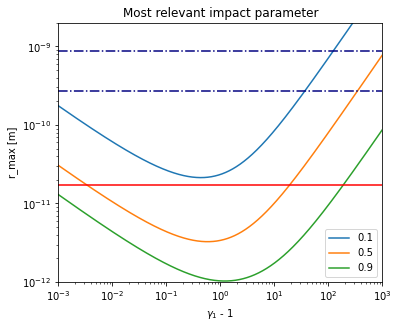

In [8]:
#PLOT OF r_max for a = 0.1/0.5/0.9 ( k = a*(gamma_1 - 1))

# 6 decades of electron energy evenly spaced logarithmically             
x_1 = np.logspace(-3,3,1000)                # x_1 = gamma_1 - 1                                  
y_1 = Max_Impact_param(x_1 + 1, 0.1*x_1)    # k = 0.1*(gamma_1 - 1)
y_2 = Max_Impact_param(x_1 + 1, 0.5*x_1)    # k = 0.5*(gamma_1 - 1)
y_3 = Max_Impact_param(x_1 + 1, 0.9*x_1)    # k = 0.9*(gamma_1 - 1)

fig_1 = plt.figure(figsize=(5,4))

axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
axes_1.set_xlabel('$\gamma_1$ - 1')
axes_1.set_ylabel('r_max [m]')
axes_1.set_title('Most relevant impact parameter')

#axes_1.plot(x_1,y_1,label='0.1',marker='o', markeredgecolor='b')
axes_1.plot(x_1,y_1,label='0.1')
axes_1.plot(x_1,y_2,label='0.5')
axes_1.plot(x_1,y_3,label='0.9')

y_F = np.full(len(x_1),TF_length(Z))
y_D10 = np.full(len(x_1),Debye_length(T_p10,n_Cu,Z))
y_D100 = np.full(len(x_1),Debye_length(T_p100,n_Cu,Z))

axes_1.plot(x_1,y_F,color='r')
axes_1.plot(x_1,y_D10,ls='-.',color='navy')
axes_1.plot(x_1,y_D100,ls='-.',color='navy')

axes_1.loglog()
axes_1.set_xlim(0.001,1000)
axes_1.set_ylim(10**(-12),2*10**(-9))
axes_1.legend(loc=0)


The plot reproduce the behaviour of r_max as expected.

N.B. The two valuse of $L_d$ are computed for the limiting case Kstar = K so for a fully ionized potential, in general for partially ionized regions we can expect bigger $L_d$s.

# $\frac{d \sigma}{dk}$ in non-relativistic regime 

The nonrelativistic (NR) electron ($1 < \gamma_{1} \leq 2 $) Bremsstrahlung cross section, differential
in the photon energy, reads in the Born approximation:

$$ \frac{d \sigma_{NR}}{dk} = \frac{64 \pi^{4} r_{e}^2 \alpha_{f}}{3 k p_{1}^{2}} \int^{\delta p_{+}}_{\delta p_{-}} |\tilde{V}_{TFD}(u)|^{2} u^{3} du $$

Where $r_{e}$ is the classical electron radius, $\delta p_{+} = p_{1} + p_{2}$ and $ \delta p_{-} = p_{1} - p_{2}$.


We have introduced $\tilde{V}_{TFD}$, the Fourier transform of the screened atomic potential $V_{TFD}$:

$$ \tilde{V}_{TFD}(u) = \frac{1}{(2 \pi)^{3}} \int_{\Omega} V_{TFD} (\mathbf{r})exp(i \mathbf{u}\cdot \mathbf{r}) d^{3}r$$

$V_{TFD}$ is the result of a weighted sum of Thomas-Fermi and Debye potential using the degree of Ionization as parameter that decide which of the two screening effect is the most relevant. $V_{TFD}$ takes the form:

$$ V_{TFD}(r) = \Big(1-\frac{Z^{*}}{Z}\Big)V_{TF}(r) + \frac{Z^{*}}{Z}V_{D}(r) $$

Combining all the formulas above we get a closed but complicate expression for the differential non relativistic cross section:

$$ \frac{d \sigma_{NR}}{dk} = \frac{16 r_{e}^{2}Z^{2} \alpha_{f}}{3k p^{2}_{1}} \big[ g(\delta p_{+}, \delta p_{-},\zeta_{F}, L_{F}) + g(\delta p_{+}, \delta p_{-},\zeta_{D}, L_{D}) + \Gamma_{c} \big] $$
 
where $\zeta_{TF} = 1 - Z^{*}/Z$ and $\zeta_{D} = Z^{*}/Z $ are the Thomas Fermi and Debye effective charges. The lengths l, $L_{F}$ and $L_{D}$ are normalized by the classical electron radius $r_{e}$.
The g function and the coupling function ($\Gamma_{c}$) are:

$$ g(\delta p_{+}, \delta p_{-}, \zeta, l) = \frac{\zeta^{2}}{2} \Big[ ln \Big( \frac{\delta p^{2}_{+}l^{2} + 1}{\delta p^{2}_{-}l^{2} + 1} \Big) + \frac{1}{\delta p^{2}_{+}l^{2} + 1} - \frac{1}{\delta p^{2}_{-}l^{2} + 1} \Big] $$ 

$$ \Gamma_{c} = \frac{\zeta_{F} \zeta_{D}}{L_{D}^{2} - L_{F}^{2}} \Big[ L_{F}^{2} ln \Big( \frac{\delta p^{2}_{-}L_{D}^{2} + 1}{\delta p^{2}_{+}L_{D}^{2} + 1} \Big) + L_{D}^{2} ln \Big( \frac{\delta p^{2}_{+}L_{F}^{2} + 1}{\delta p^{2}_{-}L_{F}^{2} + 1} \Big) \Big] $$

In [40]:
#Reminder for the cross section plots:
#let's plot differential sigma for the following values of the system parameter (as function of photon's normalized energy)
# E = 1 KeV ; E = 100 KeV                     E = (gamma_1 -1)*m*c^2 energy of the incoming electron 
# Zstar = Z ; Zstar = 1 ; Zstar = 10*(-10)    let's check the two limits of fully ionized (plasma) and neutral gas
# T_p10 ; T_p100                              the two different plasma temperatures at which we computed L_D


In [41]:
#COUPLING FUNCTION (depending on (gamma_1,gamma_2) or (gamma_1,k)) 
def Gamma_coupling(gamma_1,k,Zstar,T_p):
    L_D = Debye_length(T_p,n_Cu,Z)/r_e
    L_F = TF_length(Z)/r_e
    gamma_2 = gamma_1 - k         #energy conservation
    P_1 = np.sqrt(gamma_1**2 -1)  #normalized momentum BEFORE coll
    P_2 = np.sqrt(gamma_2**2 -1)  #normalized momentum AFTER coll
    dp_plus = (P_1 + P_2)     #maximum momentum transfered
    dp_minus = (P_1 - P_2)    #minimum momentum transfered
    zeta_F = 1-Zstar/Z     
    zeta_D = Zstar/Z
    
    Gamma_c = ((zeta_F*zeta_D)/(L_D**2 - L_F**2))*((L_F**2)*np.log(((dp_minus**2)*(L_D**2) + 1)/((dp_plus**2)*(L_D**2) + 1))\
              + (L_D**2)*np.log(((dp_plus**2)*(L_F**2) + 1)/((dp_minus**2)*(L_F**2) + 1)))                                   
    return Gamma_c

In [56]:
# g-FUNCTION (depending on (gamma_1,gamma_2) or (gamma_1,k))
def g_function(gamma_1,k,zeta,L):
    gamma_2 = gamma_1 - k         #energy conservation
    P_1 = np.sqrt(gamma_1**2 -1)  #normalized momentum BEFORE coll
    P_2 = np.sqrt(gamma_2**2 -1)  #normalized momentum AFTER coll
    dp_plus = (P_1 + P_2)     #maximum momentum transfered
    dp_minus = (P_1 - P_2)    #minimum momentum transfered

    g = (zeta**2/2)*(np.log(((dp_plus**2)*(L**2) + 1)/((dp_minus**2)*(L**2)+1))\
                     + 1/((dp_plus**2)*(L**2) + 1) - 1/((dp_minus**2)*(L**2) + 1))
    return g

$\mathbf{IMPORTANT:}$ Since we want to recover Bertrand's plot for $k\frac{d \sigma}{dk}$ in the function below the "k" appearing in the differential cross section prefactor is removed

In [43]:
#Non relativistic bremsstrahlung cross section WITHOUT Elwert correction
def k_sigma_NR(E,k,Zstar,T_p):
    L_D = Debye_length(T_p,n_Cu,Z)/r_e
    L_F = TF_length(Z)/r_e
    zeta_F = 1 - Zstar/Z
    zeta_D = Zstar/Z
    const = E/(m*c**2)                           #here we get gamma_1 from E
    #gamma_1 = np.full(len(k),const+1)
    gamma_1 = const +1
    p_1 = m*c*np.sqrt(gamma_1**2 -1)             #physical electron momentum (needed in the prefactor)
    b = (16*(r_e**2)*(Z**2)*alpha_f)/(3*p_1**2) #cross section prefactor 
    
    #SINCE WE PLOT k*sigma we multiply b by k
    #bwk = k*b
    
    k_sigma = b*(g_function(gamma_1,k,zeta_F,L_F) + g_function(gamma_1,k,zeta_D,L_D) + Gamma_coupling(gamma_1,k,Zstar,T_p))
    return k_sigma 

0.001958025411273434
[0.0001     0.00016407 0.00022814 0.00029221 0.00035628 0.00042035
 0.00048442 0.00054849 0.00061256 0.00067663 0.0007407  0.00080477
 0.00086884 0.00093291 0.00099698 0.00106105 0.00112512 0.00118919
 0.00125326 0.00131733 0.0013814  0.00144547 0.00150954 0.00157361
 0.00163768 0.00170175 0.00176582 0.00182989 0.00189396 0.00195803]
1.602e-16 29 1169000000.0
0.0001 3.861446821153785e+18
0.00016406984176804945 3.405125705568375e+18
0.0002281396835360989 3.0956685008878607e+18
0.00029220952530414836 2.8589402346552233e+18
0.0003562793670721978 2.665633953985076e+18
0.00042034920884024727 2.501115682268083e+18
0.0004844190506082967 2.3570063184015037e+18
0.0005484888923763462 2.2280480271901325e+18
0.0006125587341443957 2.1107147109978783e+18
0.0006766285759124452 2.0025172498480074e+18
0.0007406984176804946 1.901623939147527e+18
0.000804768259448544 1.806638311430263e+18
0.0008688381012165935 1.716461526221099e+18
0.000932907942984643 1.63020286101456e+18
0.00099697

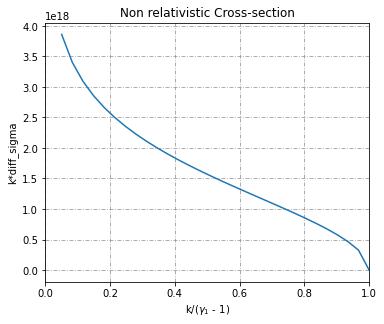

In [66]:
#PLOT E = 1 KeV without Elwert correction
E = e*10**3    #J
gamma_1 =  E/(m*c**2) + 1
k = np.linspace(0.0001,gamma_1 -1.0000,30) #ranging k so x_1 spans [0,1] but 0 gives divergence in b
print(gamma_1 -1.000)
print(k)
print(E,Z,T_p10)
for i in k: 
    print(i,k_sigma_NR(E,i,Z-1,T_p10))
    
x_1 = k/(gamma_1 - 1)              #normalized photon energy
y_1 = k_sigma_NR(E,k,Z,T_p10)           # E=1 eV ; Zstar=Z ; T_p=10 KeV   IMPORTANT !! WE'RE PLOTTING k*sigma not just sigma
#y_2 = k_sigma_NR(E,k,Z,T_p100)          # E=1 eV ; Zstar=Z ; T_p=100 KeV

print(y_1)

fig_2 = plt.figure(figsize=(5,4))

axes_2 = fig_2.add_axes([0.1,0.1,0.9,0.9])
axes_2.set_xlabel('k/($\gamma_1$ - 1)')
axes_2.set_ylabel('k*diff_sigma')
axes_2.set_title('Non relativistic Cross-section')
axes_2.plot(x_1,y_1,label='1 KeV')
axes_2.set_xlim(0,1)
#axes_2.set_ylim(0,6*10**(-25))
axes_2.grid(True, color='0.6', dashes=(5, 2, 1, 2))

In [ ]:
################################

[2.84650160e+15 6.42300767e+16 1.25766423e+17 1.87603747e+17
 2.49894623e+17 3.12798324e+17 3.76483416e+17 4.41130700e+17
 5.06936671e+17 5.74117648e+17 6.42914817e+17 7.13600515e+17
 7.86486195e+17 8.61932693e+17 9.40363730e+17 1.02228397e+18
 1.10830374e+18 1.19917349e+18 1.29583338e+18 1.39948628e+18
 1.51170950e+18 1.63463238e+18 1.77123312e+18 1.92586588e+18
 2.10527267e+18 2.32073884e+18 2.59340901e+18 2.97073808e+18
 3.60411988e+18 7.93771385e+18]


[]

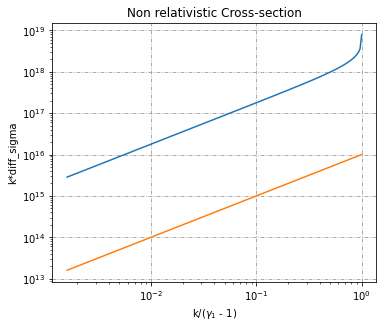

In [72]:
#PLOT E = 1 KeV without Elwert correction
E = e*10**3    #J
gamma_1 =  E/(m*c**2) + 1
k = np.linspace(0.0001,gamma_1 -1.0000,30) #ranging k so x_1 spans [0,1] but 0 gives divergence in b
p_2 = np.linspace(0.0001,np.sqrt(gamma_1**2 -1),30)

x_1 = p_2/(np.sqrt(gamma_1**2 -1))
var = gamma_1 - np.sqrt(p_2**2 +1)
#x_1 = k/(gamma_1 - 1)              #normalized photon energy
y_1 = k_sigma_NR(E,var,Z,T_p10)           # E=1 eV ; Zstar=Z ; T_p=10 KeV   IMPORTANT !! WE'RE PLOTTING k*sigma not just sigma
#y_2 = k_sigma_NR(E,k,Z,T_p100)          # E=1 eV ; Zstar=Z ; T_p=100 KeV

print(y_1)

fig_2 = plt.figure(figsize=(5,4))

axes_2 = fig_2.add_axes([0.1,0.1,0.9,0.9])
axes_2.set_xlabel('k/($\gamma_1$ - 1)')
axes_2.set_ylabel('k*diff_sigma')
axes_2.set_title('Non relativistic Cross-section')
axes_2.plot(x_1,y_1,label='1 KeV')
axes_2.plot(x_1,x_1*10**(16),label='parallel')
#axes_2.set_xlim(0,1)
#axes_2.set_ylim(0,6*10**(-25))
axes_2.grid(True, color='0.6', dashes=(5, 2, 1, 2))
axes_2.loglog()

# Elwert correction



$$ f_{E} = \frac{\beta_{1}}{\beta_{2}} \frac{1 - exp(-2 \pi Z \alpha_{f} / \beta_{1})}{1 - exp(-2 \pi Z \alpha_{f} / \beta_{2})} $$

usefull relation: $ p_i = \gamma_i m \beta_{i} c$

In [60]:
# ELWERT CORRECTION 
def f_E(gamma_1,k):
    gamma_2 = gamma_1 - k
    P_1 = np.sqrt(gamma_1**2 -1)  #normalized momentum BEFORE coll
    P_2 = np.sqrt(gamma_2**2 -1)  #normalized momentum AFTER coll
    b_1 = P_1/gamma_1
    b_2 = P_2/gamma_2
    f = (b_1/b_2)*((1-np.exp((-2*np.pi*Z*alpha_f)/b_1))/(1-np.exp((-2*np.pi*Z*alpha_f)/b_2)))
    return f
        

<ipython-input-60-7b28c1ab58e2>:8: RuntimeWarning: divide by zero encountered in true_divide
  f = (b_1/b_2)*((1-np.exp((-2*np.pi*Z*alpha_f)/b_1))/(1-np.exp((-2*np.pi*Z*alpha_f)/b_2)))
<ipython-input-65-035a8e244f94>:6: RuntimeWarning: invalid value encountered in multiply
  y_1 = f_E(gamma_1,k)*k_sigma_NR(E,k,Z,T_p10) # E=1 eV ; Zstar=Z ; T_p=10 KeV   IMPORTANT !! WE'RE PLOTTING k*sigma_NR()


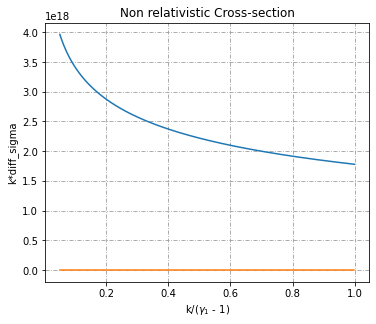

In [65]:
#PLOT E = 1 KeV without Elwert correction
E = e*10**3    #J
gamma_1 =  E/(m*c**2) + 1
k = np.linspace(0.0001,gamma_1 -1,1000) #ranging k so x_1 spans [0,1] but 0 gives divergence in b
x_1 = k/(gamma_1 - 1)              #normalized photon energy
y_1 = f_E(gamma_1,k)*k_sigma_NR(E,k,Z,T_p10) # E=1 eV ; Zstar=Z ; T_p=10 KeV   IMPORTANT !! WE'RE PLOTTING k*sigma_NR()
#y_2 = f_E(gamma_1,k)*sigma_NR(E,k,Z,T_p100)                # E=1 eV ; Zstar=Z ; T_p=10 KeV

fig_2 = plt.figure(figsize=(5,4))

axes_2 = fig_2.add_axes([0.1,0.1,0.9,0.9])
axes_2.set_xlabel('k/($\gamma_1$ - 1)')
axes_2.set_ylabel('k*diff_sigma')
axes_2.set_title('Non relativistic Cross-section')
axes_2.plot(x_1,y_1,label='1 KeV')
axes_2.plot(x_1,y_1*0)
#axes_2.set_xlim(0,1)
#axes_2.set_ylim(0,6*10**(-25))
axes_2.grid(True, color='0.6', dashes=(5, 2, 1, 2))

It diverge for $k/(\gamma_{1} -1)$ approacing 1. that's because for those valuse of k, $\beta_{2} = P_{2}/\gamma_{2}$ tends to zero so the Elwert factor diverge. This because the Hypothesis for the Elwert factor to be used are not satisfied for $k/(\gamma_{1} -1)$ approacing 1.

Bertrand points out that Elwert factor can be used in Born approximation if:

$$Z \alpha (1/\beta_{2} - 1/\beta_{1}) \ll 1$$

But Haug & Nakel's book on Bremsstrahlung prescribe:

$$\frac{Z \alpha}{\beta_{2}} \ll 1 \quad and  \quad \frac{Z \alpha}{\beta_{1}} \ll 1 $$

In [207]:
#CHECKING VALUES
E = e*10**(3) #J
gamma_1 = E/(m*c**2) + 1
p_1 = m*c*np.sqrt(gamma_1**2 -1)
print(p_1)
print(gamma_1)

1.7092047483219016e-23
1.0019580254112734
